## Problem: This data is taken from the Kaggle in which data was provided which has been extracted from PCAs of the original dataset. We have to detect fraudulents transaction out of it.

## Solution Approach: ALthough the target labels are provided, we will be solving the problem using Unsupervised Learning techniques because in real time cases you may not be provided with target labels to train the model using Supervised Learning to identify the Frauds. We will use the Labels to analyse the performance of our model.

## We have used various clustering techniques such as KMeans, DBSCAN, HDBSCAN and Local OUtlier Factor (LOF) to identify the ouliers (Frauds). Performance of the different model is compared at the end.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.metrics import roc_curve, auc,roc_auc_score

In [3]:
# Importing the dataset
df = pd.read_csv('creditcard.csv')

In [4]:
df=df.sample(frac=1)

In [5]:
df.head()

Time        V1        V2        V3        V4        V5        V6  \
3527      3014.0 -0.302521  0.447474 -0.495757 -3.214799  2.705041  2.762440   
44863    42116.0 -1.804749  0.530995  2.249758 -1.726499  0.011985 -0.775935   
160395  113329.0  0.092358  0.946021 -0.341040 -0.620721  0.850872 -0.601641   
118237   75005.0 -0.303501  0.650272 -0.491804 -2.073141  0.262044 -0.592300   
108365   70863.0 -0.888898 -0.291779  2.852340  0.326195 -1.011608 -0.116131   

              V7        V8        V9  ...       V21       V22       V23  \
3527    0.593847  0.556451  0.697720  ...  0.007343  0.250886 -0.331600   
44863   0.925451 -0.384390  0.002140  ... -0.153945 -0.346227  0.048837   
160395  0.839035  0.060036 -0.229431  ... -0.287519 -0.745570  0.108101   
118237  0.272650  0.293771 -1.747735  ...  0.347305  0.909104 -0.151448   
108365 -0.518433  0.173702 -1.206673  ...  0.027848  0.346537 -0.013424   

             V24       V25       V26       V27       V28  Amount  Class  
3527    1.009952  0.233730 -0.824471  0.241305 -0.020359    1.00      0  
44863   0.561966  0.106396  0.442180 -0.823826 -0.160082   34.25      0  
160395  0.644862 -0.487600  0.088552  0.214642  0.074345    3.99      0  
118237 -0.803777 -0.474357 -0.367417  0.303184  0.195003   10.00      0  
108365  0.346174  0.142258 -0.121670  0.121860  0.116218   81.40      0  

[5 rows x 31 columns]

In [6]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
# preparing dataset
X = df.drop(columns = ['Time','Class'],axis = 1)
y = df[['Class']]

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [9]:
X_train

V1        V2        V3        V4        V5        V6        V7  \
58822   0.007941  0.924163  0.951284  0.981809  0.065409 -0.727361  0.961166   
64922  -0.893440  0.872917  1.159362 -1.556787  0.347022 -0.242416  0.625242   
90474  -0.346250  0.376780  1.339174  1.027783 -0.227395 -0.296468  1.212869   
38171   1.323162 -0.752194  0.845688 -0.520548 -1.579646 -0.766183 -0.911682   
232692  1.906974 -0.233629 -0.717423  0.260191 -0.526664 -0.660621 -0.532771   
...          ...       ...       ...       ...       ...       ...       ...   
38689   0.805197 -2.002700  0.116896 -2.336321 -1.942083 -0.928861 -0.473329   
48387   1.009502  0.310239  1.046910  2.353547 -0.229812  0.459948 -0.267758   
244433 -1.223206 -0.780350  0.317183 -0.358435  0.726567  0.159909  0.396382   
108504 -5.825115 -5.125265  1.571832  2.658603  1.854625 -1.164381 -0.859649   
95171   1.429190 -1.094041  0.768197 -1.183350 -2.024685 -1.333547 -1.009593   

              V8        V9       V10  ...       V20       V21       V22  \
58822  -0.266164 -0.718345 -0.192297  ...  0.147671  0.204400  0.633739   
64922   0.188415 -0.205816 -0.265152  ...  0.136213 -0.029501  0.063051   
90474  -0.209311 -0.321318 -0.116758  ...  0.234767  0.178500  0.430914   
38171  -0.062413 -0.381468  0.667592  ... -0.465663 -0.191555 -0.107926   
232692  0.071694  1.058429 -0.545334  ... -0.166415 -0.193541 -0.469664   
...          ...       ...       ...  ...       ...       ...       ...   
38689  -0.115602  1.269730 -0.937655  ... -0.052898 -0.150036 -0.324407   
48387   0.255324 -0.820916  0.752774  ... -0.079319 -0.056362 -0.297353   
244433 -0.155064 -0.890033  0.495938  ... -0.991917 -0.379885 -0.004853   
108504  0.346835  0.314175  0.293472  ... -1.479980 -0.414573  1.098767   
95171  -0.172677 -1.654088  1.447783  ... -0.393065 -0.422920 -1.000693   

             V23       V24       V25       V26       V27       V28  Amount  
58822   0.035792  0.428122 -0.367815 -0.382182  0.130824  0.110298   54.06  
64922  -0.070388 -0.254148 -0.276089  0.801737  0.381642  0.213865    7.68  
90474   0.179820  0.354936 -0.064564 -0.303055 -0.133920 -0.169930  143.35  
38171   0.010840  0.413599  0.120624  1.154385 -0.036370  0.018427   27.95  
232692  0.365978 -0.121340 -0.572831 -0.303391  0.019212 -0.017162   19.99  
...          ...       ...       ...       ...       ...       ...     ...  
38689  -0.211340  0.392852  0.363287 -0.750494  0.065081  0.076561  287.86  
48387   0.116912 -0.026050  0.079230 -0.205417  0.018405  0.027358   39.00  
244433  0.635468 -0.011464 -0.475412 -0.778031  0.281615  0.126305  107.00  
108504  3.485259 -0.019466  1.327990  0.093904  0.321772 -0.333777  126.35  
95171   0.277108  0.810527 -0.009072 -0.510408  0.022810  0.034264   34.95  

[199364 rows x 29 columns]

In [10]:
y_train['Class'].value_counts()

0    199015
1       349
Name: Class, dtype: int64

## Scaling the features, because we will be working with Euclidean Distances

In [11]:

from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize
sc= StandardScaler()  # using standard scaler
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [12]:
X_train_scaled[0]

array([ 0.00234452,  0.56417467,  0.63231696,  0.69643083,  0.04560852,
       -0.54748217,  0.79306071, -0.22186816, -0.65501624, -0.17893529,
       -0.29318646,  0.61384687,  1.3621785 ,  0.07147571,  0.91375399,
       -0.38323664, -0.3584139 , -0.06168465,  0.39214051,  0.19517309,
        0.28419033,  0.87596489,  0.05660957,  0.70777561, -0.70319344,
       -0.79349497,  0.32818634,  0.34260504, -0.13897733])

In [13]:
X_train.iloc[0]

V1         0.007941
V2         0.924163
V3         0.951284
V4         0.981809
V5         0.065409
V6        -0.727361
V7         0.961166
V8        -0.266164
V9        -0.718345
V10       -0.192297
V11       -0.300361
V12        0.611094
V13        1.354898
V14        0.069068
V15        0.833868
V16       -0.334818
V17       -0.301997
V18       -0.051521
V19        0.320464
V20        0.147671
V21        0.204400
V22        0.633739
V23        0.035792
V24        0.428122
V25       -0.367815
V26       -0.382182
V27        0.130824
V28        0.110298
Amount    54.060000
Name: 58822, dtype: float64

In [14]:
 -0.539165/4.860000 #max normalisation (i.e dividing by max value of vector)

-0.11093930041152263

In [15]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


In [16]:
from sklearn.cluster import KMeans

### Unsupervised learning to identify cluster of fraudulent  customers

## KMeans

In [17]:
kmeans = KMeans(n_clusters=2,n_jobs=-1,max_iter=10000,random_state=0,algorithm="elkan")
kmeans.fit(X_train_scaled)

KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=10000,
       n_clusters=2, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [18]:
train_predicted_labels = kmeans.predict(X_train_scaled)

In [19]:
train_predicted_labels

array([1, 1, 1, ..., 1, 1, 0])

In [20]:
pd.value_counts(train_predicted_labels)

1    166795
0     32569
dtype: int64

In [21]:
print(confusion_matrix(y_train,train_predicted_labels))
print(accuracy_score(y_train,train_predicted_labels))
print(classification_report(y_train,train_predicted_labels))

[[ 32480 166535]
 [    89    260]]
0.16422222668084507
              precision    recall  f1-score   support

           0       1.00      0.16      0.28    199015
           1       0.00      0.74      0.00       349

    accuracy                           0.16    199364
   macro avg       0.50      0.45      0.14    199364
weighted avg       1.00      0.16      0.28    199364



In [22]:
tn,fp,fn,tp=confusion_matrix(y_train,train_predicted_labels).ravel()

In [23]:
print(tn,fp,fn,tp)

32480 166535 89 260


In [24]:
kmeans_predicted_test_labels = kmeans.predict(X_test_scaled)

In [25]:
kmeans_predicted_test_labels

array([1, 1, 1, ..., 0, 1, 1])

In [26]:
pd.value_counts(kmeans_predicted_test_labels)

1    71391
0    14052
dtype: int64

In [27]:
print(confusion_matrix(y_test,kmeans_predicted_test_labels))
print(accuracy_score(y_test,kmeans_predicted_test_labels))
print(classification_report(y_test,kmeans_predicted_test_labels))

[[14004 71296]
 [   48    95]]
0.16501059185655934
              precision    recall  f1-score   support

           0       1.00      0.16      0.28     85300
           1       0.00      0.66      0.00       143

    accuracy                           0.17     85443
   macro avg       0.50      0.41      0.14     85443
weighted avg       0.99      0.17      0.28     85443



In [28]:
reassignflag=False
if tn+tp<fn+fp:
	# clustering is opposite of original classification
	reassignflag=True
kmeans_predicted_test_labels=kmeans.predict(X_test_scaled )
if reassignflag:
	kmeans_predicted_test_labels=1-kmeans_predicted_test_labels
#calculating confusion matrix for kmeans
tn,fp,fn,tp=confusion_matrix(y_test,kmeans_predicted_test_labels).ravel()

In [29]:
pd.value_counts(kmeans_predicted_test_labels)

0    71391
1    14052
dtype: int64

In [30]:
print(tn,fp,fn,tp)

71296 14004 95 48


In [31]:
print(confusion_matrix(y_test,kmeans_predicted_test_labels))
print(accuracy_score(y_test,kmeans_predicted_test_labels))
print(classification_report(y_test,kmeans_predicted_test_labels))

[[71296 14004]
 [   95    48]]
0.8349894081434407
              precision    recall  f1-score   support

           0       1.00      0.84      0.91     85300
           1       0.00      0.34      0.01       143

    accuracy                           0.83     85443
   macro avg       0.50      0.59      0.46     85443
weighted avg       1.00      0.83      0.91     85443



In [32]:
#scoring kmeans
kmeans_accuracy_score=accuracy_score(y_test,kmeans_predicted_test_labels)
kmeans_precison_score=precision_score(y_test,kmeans_predicted_test_labels)
kmeans_recall_score=recall_score(y_test,kmeans_predicted_test_labels)
kmeans_f1_score=f1_score(y_test,kmeans_predicted_test_labels)
#printing
print("")
print("K-Means")
print("Confusion Matrix")
print("tn =",tn,"fp =",fp)
print("fn =",fn,"tp =",tp)
print("Scores")
print("Accuracy -->",kmeans_accuracy_score)
print("Precison -->",kmeans_precison_score)
print("Recall -->",kmeans_recall_score)
print("F1 -->",kmeans_f1_score)



K-Means
Confusion Matrix
tn = 71296 fp = 14004
fn = 95 tp = 48
Scores
Accuracy --> 0.8349894081434407
Precison --> 0.0034158838599487617
Recall --> 0.3356643356643357
F1 --> 0.006762944698837619


## IMPLEMENTING OUTLIER DETECTION USING DBSCAN

## Algorithm 

### 1 — Calculate the distance from the new points to all the Core points (only the Core points, since they are the ones actually defining the clusters) and look for the minimum (distance to the closest neighbor inside a cluster).
### 2 — Compare the distance to the closest neighbor inside a cluster with eps, since this is the limit between two points to be consider neighbors, this way, we find if any of the Core points are actually neighbors with our test data.
### 3 — If the distance is larger than eps the point is labeled as anomalous, since it has no neighbors in the clusters

In [33]:
X_train_scaled

array([[ 2.34452252e-03,  5.64174672e-01,  6.32316956e-01, ...,
         3.28186343e-01,  3.42605038e-01, -1.38977331e-01],
       [-4.60590911e-01,  5.32910641e-01,  7.70414983e-01, ...,
         9.61616706e-01,  6.63697844e-01, -3.28710390e-01],
       [-1.79562824e-01,  2.30227557e-01,  8.89753816e-01, ...,
        -3.40413035e-01, -5.26194950e-01,  2.26293580e-01],
       ...,
       [-6.29953453e-01, -4.75712427e-01,  2.11474100e-01, ...,
         7.09003994e-01,  3.92232935e-01,  7.75916244e-02],
       [-2.99342197e+00, -3.12645235e+00,  1.04416460e+00, ...,
         8.10416946e-01, -1.03417293e+00,  1.56749337e-01],
       [ 7.32275749e-01, -6.67088616e-01,  5.10804906e-01, ...,
         5.54025918e-02,  1.06876170e-01, -2.17153242e-01]])

In [34]:
y_test['Class'].value_counts()

0    85300
1      143
Name: Class, dtype: int64

In [35]:
from sklearn.cluster import DBSCAN
outlier_detection = DBSCAN(eps = 0.5,min_samples=15,n_jobs=-1)

In [36]:
outlier_in_train = outlier_detection.fit_predict(X_train_scaled)

In [37]:
pd.value_counts(outlier_in_train)

-1      171048
 26       1112
 5         839
 7         655
 2         625
         ...  
 408        13
 407        13
 404        13
 393        13
 398         9
Length: 420, dtype: int64

In [38]:
def dbscan_predict(model, X):

    nr_samples = X.shape[0]

    y_new = np.ones(shape=nr_samples, dtype=int) * -1

    for i in range(nr_samples):
        diff = model.components_ - X[i, :]  # NumPy broadcasting

        dist = np.linalg.norm(diff, axis=1)  # Euclidean distance

        shortest_dist_idx = np.argmin(dist)

        if dist[shortest_dist_idx] < model.eps:
            y_new[i] = model.labels_[model.core_sample_indices_[shortest_dist_idx]]

    return y_new

In [39]:
y_pred = dbscan_predict(outlier_detection, X_test_scaled)

In [40]:
pd.value_counts(y_pred)

-1      73979
 26       449
 5        332
 7        291
 2        232
        ...  
 381        2
 377        1
 249        1
 193        1
 163        1
Length: 419, dtype: int64

In [41]:
X_test['fraud'] = y_pred

C:\Users\somal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
X_test.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
fraud     0
dtype: int64

In [43]:
X_test['fraud'].nunique()

419

In [44]:
train_labels = outlier_detection.labels_

In [45]:
from sklearn import metrics

In [46]:
#identifying core samples
core_samples = np.zeros_like(train_labels,dtype = bool)
len(core_samples)

199364

In [47]:
core_samples[0]

False

In [48]:
core_samples[outlier_detection.core_sample_indices_] = True
print(core_samples)

[False False False ... False False False]


In [49]:
pd.value_counts(core_samples)

False    176411
True      22953
dtype: int64

In [50]:
n_clusters_ = len(set(train_labels)) - (1 if -1 in train_labels else 0)
n_clusters_

419

In [51]:
vc = pd.value_counts(outlier_in_train)

In [52]:
vc.values

array([171048,   1112,    839,    655,    625,    508,    483,    439,
          367,    364,    349,    349,    304,    294,    284,    283,
          278,    265,    252,    240,    238,    225,    220,    219,
          219,    211,    210,    207,    201,    200,    198,    188,
          182,    180,    173,    171,    167,    162,    159,    153,
          150,    147,    147,    146,    137,    136,    131,    131,
          130,    125,    124,    123,    120,    119,    117,    112,
          109,    109,    109,    108,    107,    107,    106,    106,
          105,    105,    104,    103,    102,    101,    101,    100,
           99,     98,     98,     98,     96,     95,     94,     93,
           93,     93,     92,     90,     88,     85,     84,     81,
           80,     79,     77,     77,     75,     75,     75,     74,
           74,     73,     73,     72,     72,     69,     69,     69,
           69,     69,     68,     68,     68,     66,     65,     65,
      

In [53]:
la = list(vc.index)

In [54]:
np.array(la)

array([ -1,  26,   5,   7,   2,  93,  41,   8,  34,  98,  80,  89,  45,
        79,  55,  85,  33, 122,  76,  37,   6,  40,  17,   3,  50,  22,
        78,  54,  90,  91,  27,  84, 108,  71,  38,  66,  29,  58,  65,
       191, 171,  31, 100,  59, 129, 209,  73, 105,  70,  72,  69,  64,
       170,  25, 117, 233,  48, 121, 202, 173, 177, 166, 214, 102,  49,
       114,  42, 225, 244,  51, 106,  43, 152, 148, 131, 189,  21, 143,
       158, 187,  87,   1, 124, 179, 198, 190, 107, 135,  11,  20,  47,
       167,   9, 228, 229, 118, 186,  36,  14,  96,  75, 145, 128,  62,
       140,  95, 149,  35,  68, 103, 162,   0, 246,  39, 240,  56, 160,
       257, 144, 195,  82, 200,  74, 188,  44, 141,  18, 250, 248,  86,
       176, 222,  99, 259, 339, 220,  77,  23, 132, 256, 234, 175, 227,
       146,  28, 142, 125,  46, 183, 291, 110,  13, 205, 346,  19, 213,
       116, 363, 194, 138, 353, 180, 218, 231, 354, 276,  81, 274, 285,
       134,  15, 178, 127, 211, 185, 232, 207, 341, 159, 261, 25

In [55]:
df_frauds = pd.DataFrame(data = vc.values,index = [np.array(la)], columns = ['number_of_sample'])

In [56]:
df_frauds

number_of_sample
-1              171048
 26               1112
 5                 839
 7                 655
 2                 625
...                ...
 408                13
 407                13
 404                13
 393                13
 398                 9

[420 rows x 1 columns]

In [57]:
df1 = df_frauds[df_frauds['number_of_sample'] <= 200].reset_index()

In [58]:
df1

level_0  number_of_sample
0         91               200
1         27               198
2         84               188
3        108               182
4         71               180
..       ...               ...
386      408                13
387      407                13
388      404                13
389      393                13
390      398                 9

[391 rows x 2 columns]

### Silhoute score to measure the performance of cluster i.e b-a/max(a,b) , seperation - cohesion/max(sep,coh)

In [128]:
print("silhoute_score",metrics.silhouette_score(X_train_scaled,train_labels))

silhoute_score -0.38929636723007593


In [60]:
final_train_df = X_train.copy()

In [61]:
lf_fraud = list(df1['level_0'])
lf_fraud

[91,
 27,
 84,
 108,
 71,
 38,
 66,
 29,
 58,
 65,
 191,
 171,
 31,
 100,
 59,
 129,
 209,
 73,
 105,
 70,
 72,
 69,
 64,
 170,
 25,
 117,
 233,
 48,
 121,
 202,
 173,
 177,
 166,
 214,
 102,
 49,
 114,
 42,
 225,
 244,
 51,
 106,
 43,
 152,
 148,
 131,
 189,
 21,
 143,
 158,
 187,
 87,
 1,
 124,
 179,
 198,
 190,
 107,
 135,
 11,
 20,
 47,
 167,
 9,
 228,
 229,
 118,
 186,
 36,
 14,
 96,
 75,
 145,
 128,
 62,
 140,
 95,
 149,
 35,
 68,
 103,
 162,
 0,
 246,
 39,
 240,
 56,
 160,
 257,
 144,
 195,
 82,
 200,
 74,
 188,
 44,
 141,
 18,
 250,
 248,
 86,
 176,
 222,
 99,
 259,
 339,
 220,
 77,
 23,
 132,
 256,
 234,
 175,
 227,
 146,
 28,
 142,
 125,
 46,
 183,
 291,
 110,
 13,
 205,
 346,
 19,
 213,
 116,
 363,
 194,
 138,
 353,
 180,
 218,
 231,
 354,
 276,
 81,
 274,
 285,
 134,
 15,
 178,
 127,
 211,
 185,
 232,
 207,
 341,
 159,
 261,
 258,
 278,
 184,
 270,
 147,
 325,
 156,
 210,
 310,
 265,
 104,
 253,
 217,
 52,
 226,
 295,
 111,
 323,
 269,
 4,
 314,
 126,
 12,
 109,
 268,
 241,

In [62]:
final_train_df['cluster'] = outlier_in_train

In [63]:
final_train_df.head()

V1        V2        V3        V4        V5        V6        V7  \
58822   0.007941  0.924163  0.951284  0.981809  0.065409 -0.727361  0.961166   
64922  -0.893440  0.872917  1.159362 -1.556787  0.347022 -0.242416  0.625242   
90474  -0.346250  0.376780  1.339174  1.027783 -0.227395 -0.296468  1.212869   
38171   1.323162 -0.752194  0.845688 -0.520548 -1.579646 -0.766183 -0.911682   
232692  1.906974 -0.233629 -0.717423  0.260191 -0.526664 -0.660621 -0.532771   

              V8        V9       V10  ...       V21       V22       V23  \
58822  -0.266164 -0.718345 -0.192297  ...  0.204400  0.633739  0.035792   
64922   0.188415 -0.205816 -0.265152  ... -0.029501  0.063051 -0.070388   
90474  -0.209311 -0.321318 -0.116758  ...  0.178500  0.430914  0.179820   
38171  -0.062413 -0.381468  0.667592  ... -0.191555 -0.107926  0.010840   
232692  0.071694  1.058429 -0.545334  ... -0.193541 -0.469664  0.365978   

             V24       V25       V26       V27       V28  Amount  cluster  
58822   0.428122 -0.367815 -0.382182  0.130824  0.110298   54.06       -1  
64922  -0.254148 -0.276089  0.801737  0.381642  0.213865    7.68       -1  
90474   0.354936 -0.064564 -0.303055 -0.133920 -0.169930  143.35       -1  
38171   0.413599  0.120624  1.154385 -0.036370  0.018427   27.95       -1  
232692 -0.121340 -0.572831 -0.303391  0.019212 -0.017162   19.99       -1  

[5 rows x 30 columns]

In [64]:
final_train_df['actual_fraud'] = y_train

In [65]:
final_train_df['predicted_fraud'] = final_train_df['cluster'].apply(lambda x: 1 if x in lf_fraud else 0)

In [66]:
final_train_df['predicted_fraud'].value_counts()

0    181288
1     18076
Name: predicted_fraud, dtype: int64

In [68]:
len(outlier_detection.core_sample_indices_)

22953

In [69]:
X_train['fraud'] = outlier_in_train

C:\Users\somal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [70]:
X_train['fraud'].nunique()

420

In [71]:
X_train

V1        V2        V3        V4        V5        V6        V7  \
58822   0.007941  0.924163  0.951284  0.981809  0.065409 -0.727361  0.961166   
64922  -0.893440  0.872917  1.159362 -1.556787  0.347022 -0.242416  0.625242   
90474  -0.346250  0.376780  1.339174  1.027783 -0.227395 -0.296468  1.212869   
38171   1.323162 -0.752194  0.845688 -0.520548 -1.579646 -0.766183 -0.911682   
232692  1.906974 -0.233629 -0.717423  0.260191 -0.526664 -0.660621 -0.532771   
...          ...       ...       ...       ...       ...       ...       ...   
38689   0.805197 -2.002700  0.116896 -2.336321 -1.942083 -0.928861 -0.473329   
48387   1.009502  0.310239  1.046910  2.353547 -0.229812  0.459948 -0.267758   
244433 -1.223206 -0.780350  0.317183 -0.358435  0.726567  0.159909  0.396382   
108504 -5.825115 -5.125265  1.571832  2.658603  1.854625 -1.164381 -0.859649   
95171   1.429190 -1.094041  0.768197 -1.183350 -2.024685 -1.333547 -1.009593   

              V8        V9       V10  ...       V21       V22       V23  \
58822  -0.266164 -0.718345 -0.192297  ...  0.204400  0.633739  0.035792   
64922   0.188415 -0.205816 -0.265152  ... -0.029501  0.063051 -0.070388   
90474  -0.209311 -0.321318 -0.116758  ...  0.178500  0.430914  0.179820   
38171  -0.062413 -0.381468  0.667592  ... -0.191555 -0.107926  0.010840   
232692  0.071694  1.058429 -0.545334  ... -0.193541 -0.469664  0.365978   
...          ...       ...       ...  ...       ...       ...       ...   
38689  -0.115602  1.269730 -0.937655  ... -0.150036 -0.324407 -0.211340   
48387   0.255324 -0.820916  0.752774  ... -0.056362 -0.297353  0.116912   
244433 -0.155064 -0.890033  0.495938  ... -0.379885 -0.004853  0.635468   
108504  0.346835  0.314175  0.293472  ... -0.414573  1.098767  3.485259   
95171  -0.172677 -1.654088  1.447783  ... -0.422920 -1.000693  0.277108   

             V24       V25       V26       V27       V28  Amount  fraud  
58822   0.428122 -0.367815 -0.382182  0.130824  0.110298   54.06     -1  
64922  -0.254148 -0.276089  0.801737  0.381642  0.213865    7.68     -1  
90474   0.354936 -0.064564 -0.303055 -0.133920 -0.169930  143.35     -1  
38171   0.413599  0.120624  1.154385 -0.036370  0.018427   27.95     -1  
232692 -0.121340 -0.572831 -0.303391  0.019212 -0.017162   19.99     -1  
...          ...       ...       ...       ...       ...     ...    ...  
38689   0.392852  0.363287 -0.750494  0.065081  0.076561  287.86     -1  
48387  -0.026050  0.079230 -0.205417  0.018405  0.027358   39.00     -1  
244433 -0.011464 -0.475412 -0.778031  0.281615  0.126305  107.00     -1  
108504 -0.019466  1.327990  0.093904  0.321772 -0.333777  126.35     -1  
95171   0.810527 -0.009072 -0.510408  0.022810  0.034264   34.95     -1  

[199364 rows x 30 columns]

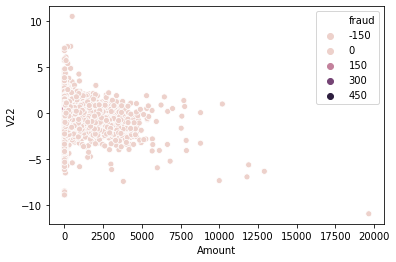

In [72]:
sns.scatterplot(x = 'Amount',y = 'V22',data = X_train, hue = 'fraud')

In [125]:
final_train_df

V1        V2        V3        V4        V5        V6        V7  \
58822   0.007941  0.924163  0.951284  0.981809  0.065409 -0.727361  0.961166   
64922  -0.893440  0.872917  1.159362 -1.556787  0.347022 -0.242416  0.625242   
90474  -0.346250  0.376780  1.339174  1.027783 -0.227395 -0.296468  1.212869   
38171   1.323162 -0.752194  0.845688 -0.520548 -1.579646 -0.766183 -0.911682   
232692  1.906974 -0.233629 -0.717423  0.260191 -0.526664 -0.660621 -0.532771   
...          ...       ...       ...       ...       ...       ...       ...   
38689   0.805197 -2.002700  0.116896 -2.336321 -1.942083 -0.928861 -0.473329   
48387   1.009502  0.310239  1.046910  2.353547 -0.229812  0.459948 -0.267758   
244433 -1.223206 -0.780350  0.317183 -0.358435  0.726567  0.159909  0.396382   
108504 -5.825115 -5.125265  1.571832  2.658603  1.854625 -1.164381 -0.859649   
95171   1.429190 -1.094041  0.768197 -1.183350 -2.024685 -1.333547 -1.009593   

              V8        V9       V10  ...       V23       V24       V25  \
58822  -0.266164 -0.718345 -0.192297  ...  0.035792  0.428122 -0.367815   
64922   0.188415 -0.205816 -0.265152  ... -0.070388 -0.254148 -0.276089   
90474  -0.209311 -0.321318 -0.116758  ...  0.179820  0.354936 -0.064564   
38171  -0.062413 -0.381468  0.667592  ...  0.010840  0.413599  0.120624   
232692  0.071694  1.058429 -0.545334  ...  0.365978 -0.121340 -0.572831   
...          ...       ...       ...  ...       ...       ...       ...   
38689  -0.115602  1.269730 -0.937655  ... -0.211340  0.392852  0.363287   
48387   0.255324 -0.820916  0.752774  ...  0.116912 -0.026050  0.079230   
244433 -0.155064 -0.890033  0.495938  ...  0.635468 -0.011464 -0.475412   
108504  0.346835  0.314175  0.293472  ...  3.485259 -0.019466  1.327990   
95171  -0.172677 -1.654088  1.447783  ...  0.277108  0.810527 -0.009072   

             V26       V27       V28  Amount  cluster  actual_fraud  \
58822  -0.382182  0.130824  0.110298   54.06       -1             0   
64922   0.801737  0.381642  0.213865    7.68       -1             0   
90474  -0.303055 -0.133920 -0.169930  143.35       -1             0   
38171   1.154385 -0.036370  0.018427   27.95       -1             0   
232692 -0.303391  0.019212 -0.017162   19.99       -1             0   
...          ...       ...       ...     ...      ...           ...   
38689  -0.750494  0.065081  0.076561  287.86       -1             0   
48387  -0.205417  0.018405  0.027358   39.00       -1             0   
244433 -0.778031  0.281615  0.126305  107.00       -1             0   
108504  0.093904  0.321772 -0.333777  126.35       -1             0   
95171  -0.510408  0.022810  0.034264   34.95       -1             0   

        predicted_fraud  
58822                 0  
64922                 0  
90474                 0  
38171                 0  
232692                0  
...                 ...  
38689                 0  
48387                 0  
244433                0  
108504                0  
95171                 0  

[199364 rows x 32 columns]

In [126]:
print(confusion_matrix(final_train_df['actual_fraud'],final_train_df['predicted_fraud']))
print(accuracy_score(final_train_df['actual_fraud'],final_train_df['predicted_fraud']))
print(classification_report(final_train_df['actual_fraud'],final_train_df['predicted_fraud']))

[[180939  18076]
 [   349      0]]
0.9075811079231958
              precision    recall  f1-score   support

           0       1.00      0.91      0.95    199015
           1       0.00      0.00      0.00       349

    accuracy                           0.91    199364
   macro avg       0.50      0.45      0.48    199364
weighted avg       1.00      0.91      0.95    199364



In [73]:
import hdbscan

In [74]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=11, prediction_data=True).fit(X_test_scaled)


In [75]:
clusterer

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=False, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=5, min_samples=11, p=None,
        prediction_data=True)

In [76]:
test_labels, strengths = hdbscan.approximate_predict(clusterer, X_test_scaled)

In [77]:
test_labels

array([ -1, 328, 520, ...,  -1,  -1, 324])

In [78]:
pd.value_counts(test_labels)

-1      56694
 194      780
 148      746
 198      673
 192      584
        ...  
 286        5
 418        5
 420        5
 37         5
 479        5
Length: 580, dtype: int64

In [79]:
strengths, len(strengths)

(array([0.        , 1.        , 0.48363766, ..., 0.        , 0.        ,
        0.42518482]), 85443)

In [80]:
clusterer.outlier_scores_

C:\Users\somal\Anaconda3\lib\site-packages\hdbscan\hdbscan_.py:1052: RuntimeWarning: invalid value encountered in double_scalars
  self._outlier_scores = outlier_scores(self._condensed_tree)


array([0.02388979, 0.        , 0.51636234, ..., 0.01524993, 0.01764113,
       0.57481518])

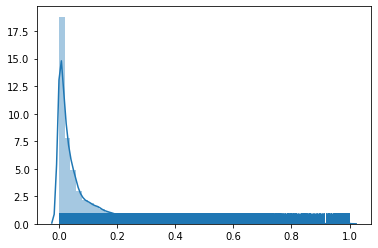

In [81]:
sns.distplot(clusterer.outlier_scores_[np.isfinite(clusterer.outlier_scores_)], rug=True)

In [82]:
data = X_test_scaled.T[[0,1]]

In [83]:
data.T[0].shape

(2,)

C:\Users\somal\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


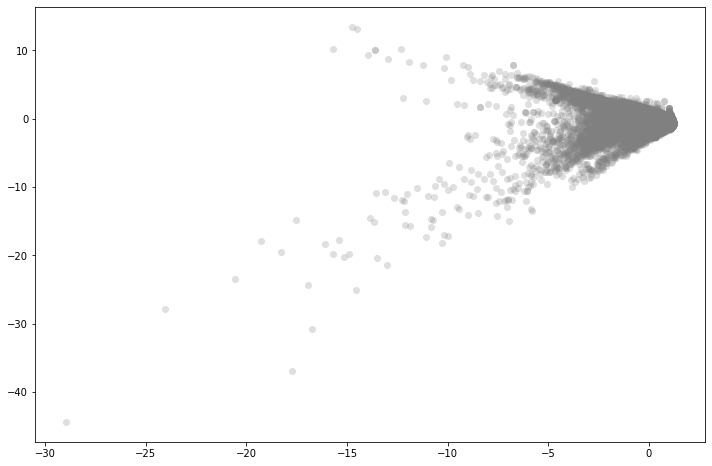

In [84]:
threshold = pd.Series(clusterer.outlier_scores_).quantile(0.95)
outliers = np.where(clusterer.outlier_scores_ > threshold)[0]
figure = plt.subplots(figsize = (12,8))
plt.scatter(X_test_scaled.T[0],X_test_scaled.T[1],s=50, linewidth=0, c='gray', alpha=0.25,)
#plt.scatter(X_test_scaled[outliers],s=50, linewidth=0, c='red', alpha=0.5)

In [85]:
df_scatter = pd.DataFrame(columns = ['c1'],data = X_test_scaled.T[0])

In [86]:
df_scatter['c2'] = X_test_scaled.T[1]

In [87]:
list(df_scatter.index)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [88]:
df_scatter

c1        c2
0      1.019771 -0.124649
1      0.052427  0.664016
2      0.514036 -0.000393
3      0.446804 -0.145955
4      1.039342 -0.450463
...         ...       ...
85438 -0.365690  0.830419
85439  1.162184 -0.836570
85440 -0.583712 -0.498572
85441 -0.593627 -0.529211
85442  1.008711  0.293303

[85443 rows x 2 columns]

In [89]:
list1 = list(outliers)
list2 = list(df_scatter.index)

In [90]:
len(list1)

4269

In [91]:
list2

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [92]:
df_scatter['outlier_temp'] = list(df_scatter.index)

In [93]:
df_scatter

c1        c2  outlier_temp
0      1.019771 -0.124649             0
1      0.052427  0.664016             1
2      0.514036 -0.000393             2
3      0.446804 -0.145955             3
4      1.039342 -0.450463             4
...         ...       ...           ...
85438 -0.365690  0.830419         85438
85439  1.162184 -0.836570         85439
85440 -0.583712 -0.498572         85440
85441 -0.593627 -0.529211         85441
85442  1.008711  0.293303         85442

[85443 rows x 3 columns]

In [94]:
df_scatter['outlier'] = df_scatter['outlier_temp'].apply(lambda x: 1 if x in list1 else 0)

In [95]:
df_scatter['outlier'].value_counts()

0    81174
1     4269
Name: outlier, dtype: int64

In [96]:
df_scatter['c3'] = X_test_scaled.T[2]

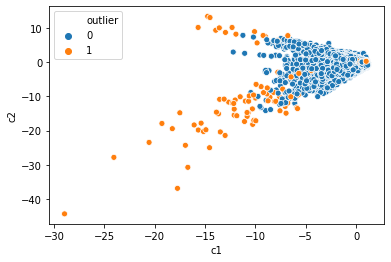

In [97]:
sns.scatterplot(x = 'c1',y = 'c2',hue = 'outlier', data = df_scatter )

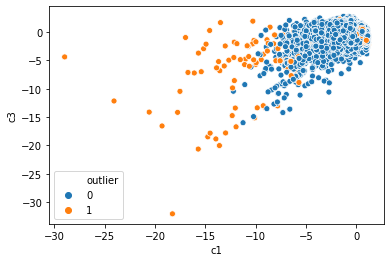

In [98]:
sns.scatterplot(x = 'c1',y = 'c3',hue = 'outlier', data = df_scatter )

In [99]:
X_test.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'fraud'],
      dtype='object')

In [100]:
df_copy = pd.DataFrame(data = X_test_scaled,columns = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'])

In [101]:
df_copy['outlier'] = df_scatter['outlier']

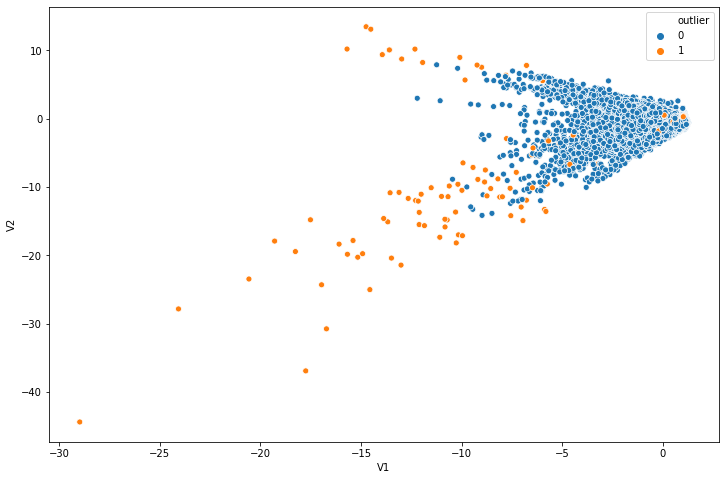

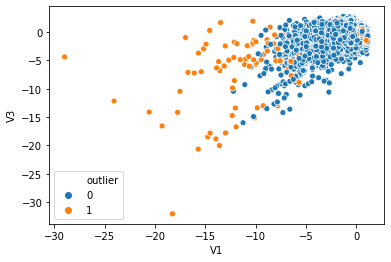

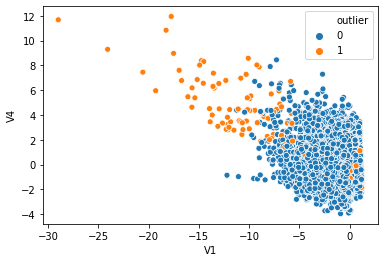

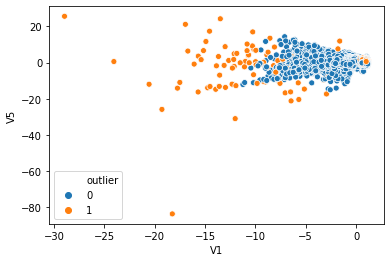

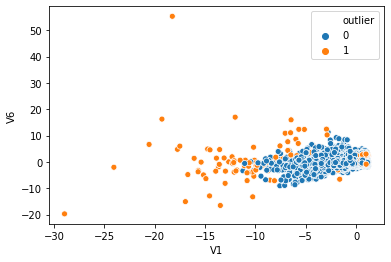

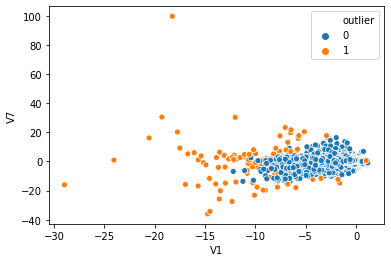

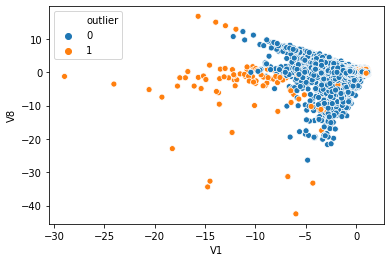

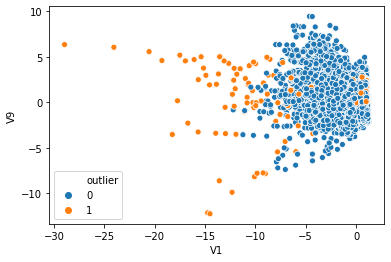

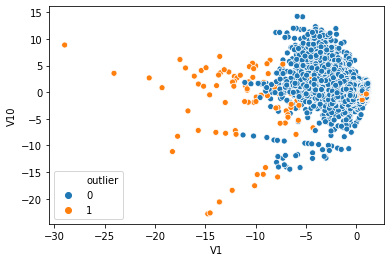

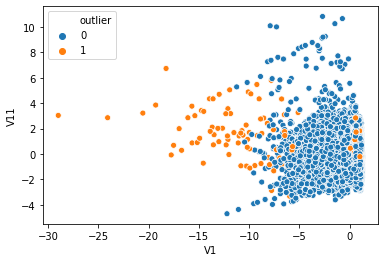

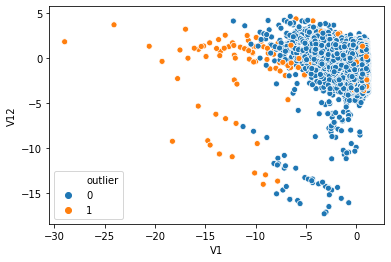

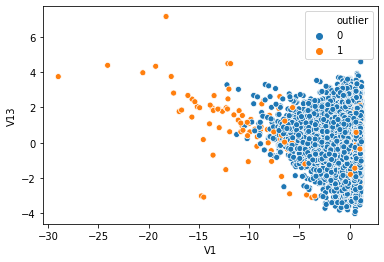

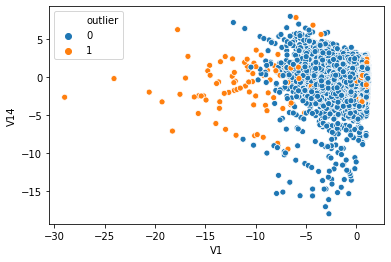

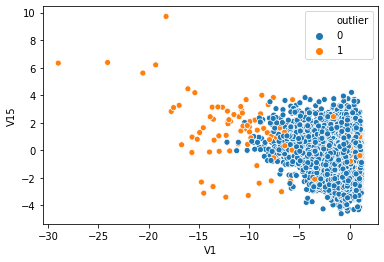

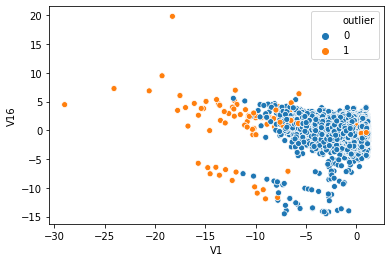

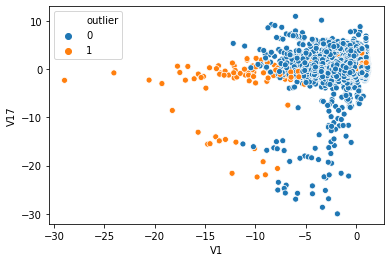

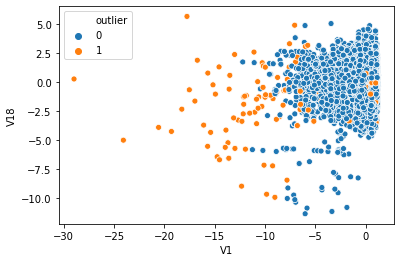

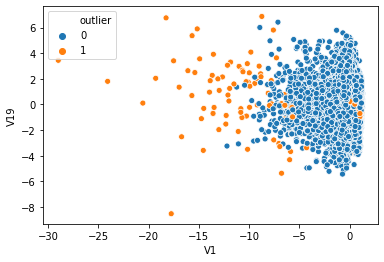

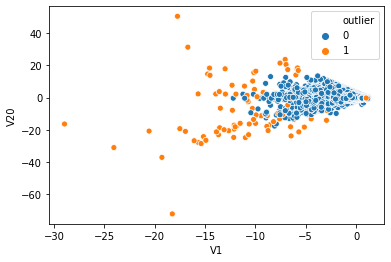

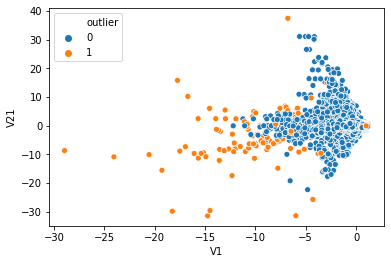

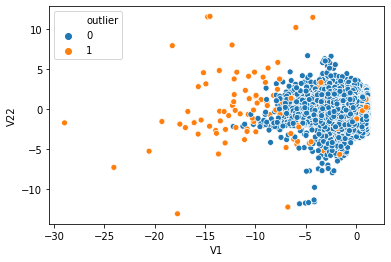

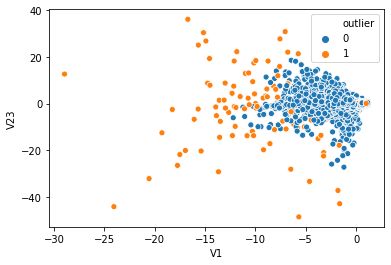

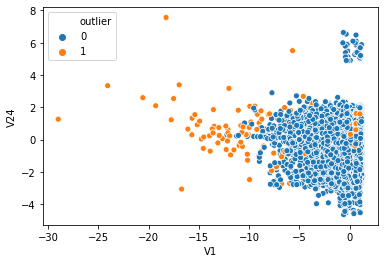

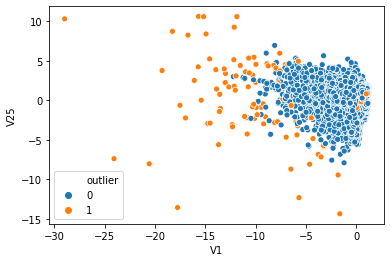

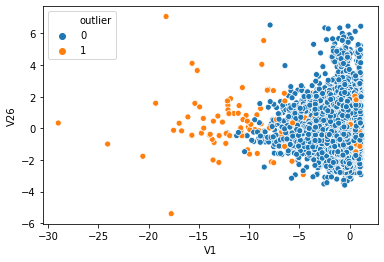

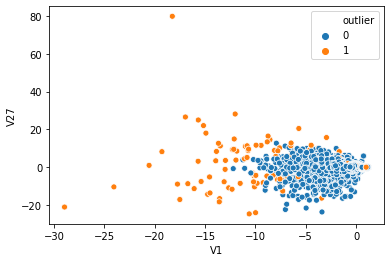

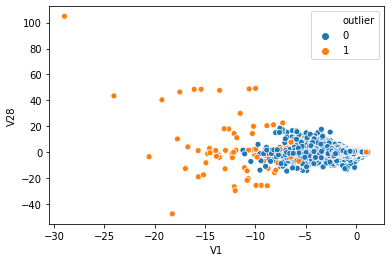

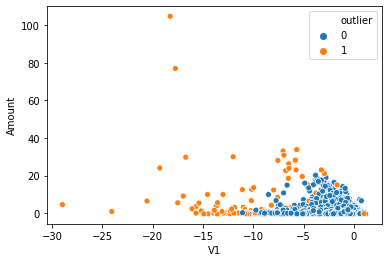

In [102]:
figure = plt.subplots(figsize = (12,8))

for i in ['V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']:
    sns.scatterplot(x = 'V1', y = i,hue = 'outlier', data = df_copy )
    plt.show()

In [103]:
df_copy['actual'] = list(y_test['Class'])

In [104]:
list(y_test['Class'])

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [105]:
df_copy

V1        V2        V3        V4        V5        V6        V7  \
0      1.019771 -0.124649 -0.078145  0.489297 -0.419756 -0.345605 -0.503068   
1      0.052427  0.664016 -0.133804 -0.316281  0.572366 -0.749876  0.839635   
2      0.514036 -0.000393  0.221378  1.031409 -0.123980 -0.104150  0.190704   
3      0.446804 -0.145955  0.447732  0.915033 -0.549599 -0.359253 -0.002347   
4      1.039342 -0.450463 -2.056939 -0.266922  1.757825  2.544819 -0.277611   
...         ...       ...       ...       ...       ...       ...       ...   
85438 -0.365690  0.830419  0.468566 -0.071337  0.048875 -0.548066  0.596964   
85439  1.162184 -0.836570 -0.672835 -1.190472 -0.781784 -0.223551 -0.976582   
85440 -0.583712 -0.498572  0.911249 -0.234325 -1.686000  0.565120  0.184022   
85441 -0.593627 -0.529211  0.661465  0.748105 -0.952464  1.708083  1.360087   
85442  1.008711  0.293303 -1.453638  1.121750  0.590511 -0.879107  0.580603   

             V8        V9       V10  ...       V22       V23       V24  \
0     -0.173923  2.344973 -0.532580  ...  0.981707  0.155542 -0.181521   
1     -0.126533 -0.165743 -0.801812  ... -0.928347  0.241497  1.654167   
2     -0.068190  0.149126 -0.173294  ... -0.047531 -0.234226  0.179295   
3      0.004322 -0.098679  0.129812  ... -0.224110 -0.126014  0.854368   
4      0.540384 -0.925244  0.987728  ... -0.520372  0.100714  1.101691   
...         ...       ...       ...  ...       ...       ...       ...   
85438  0.145231 -0.770766 -0.587895  ... -1.630412  0.324626 -0.233001   
85439 -0.024842 -1.339801  1.619258  ...  0.154377  0.434208  1.121450   
85440  0.417630 -1.118032 -0.258068  ...  1.991641  1.158703  0.203234   
85441  0.293924 -0.220669 -0.602935  ...  1.170167  1.568727 -1.969000   
85442 -0.302136  0.090198 -0.344417  ...  0.212010  0.059692  1.592081   

            V25       V26       V27       V28    Amount  outlier  actual  
0     -0.108186 -0.517491  0.056392 -0.127702 -0.319261        0       0  
1     -0.905001  0.178842  0.579529  0.279224 -0.345442        0       0  
2      1.263037 -0.672401  0.071882  0.100133  0.014756        1       0  
3      0.558785 -1.086328 -0.000144  0.150177  0.253498        0       0  
4      0.729406 -0.988142  0.040457 -0.165181 -0.094428        0       0  
...         ...       ...       ...       ...       ...      ...     ...  
85438 -1.309371 -0.459890 -0.355238  0.259223 -0.251353        0       0  
85439 -0.391923 -0.435935  0.004153 -0.173567 -0.319220        0       0  
85440 -0.453511  0.085604 -0.080242  0.310273  1.153482        0       0  
85441 -0.354383 -0.374430  0.124787  0.594437  1.853015        0       0  
85442  0.815245 -1.134920 -0.013131 -0.046329 -0.250821        1       0  

[85443 rows x 31 columns]

In [106]:
print(confusion_matrix(df_copy['actual'],df_copy['outlier']))
print(accuracy_score(df_copy['actual'],df_copy['outlier']))
print(classification_report(df_copy['actual'],df_copy['outlier']))

[[81047  4253]
 [  127    16]]
0.9487377549945578
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     85300
           1       0.00      0.11      0.01       143

    accuracy                           0.95     85443
   macro avg       0.50      0.53      0.49     85443
weighted avg       1.00      0.95      0.97     85443



### Local Outlier Factor

### The method, step-by-step:

## For each point P, do the following:

### 1. Calculate distances between P and every other point (manhattan = |x1-x2| + |y1-y2|) = dist(p1,p2)
### 2. Find the Kth closest point (Kth nearest neighbor’s distance=K-Dist(P))
### 3. Find the K closest points (those whose distances are smaller than the Kth point), the K-distance neighborhood of P, Nk(P).
### 4. Find its density (Local Reachability Density= LRDk(p) — a measure of how close its neighbors are to it), basically the inverse of the avg distance between point p and its neighbors. The lower the density, the farther p is from its neighbors.
### 5. Find its local outlier factor, LOFk(p), as sum(reachability distances of neighbors to P) x sum(densities of neighbors). LOFk(P) is basically the sum of the distances between P and its neighboring points, weighted by the sum those points’ densities (how far they are from their k neighboring points).

In [130]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=130, contamination=0.01)

In [131]:
y_pred_test = clf.fit_predict(X_test_scaled)

In [132]:
y_pred_test

array([1, 1, 1, ..., 1, 1, 1])

In [133]:
pd.value_counts(y_pred_test)

 1    84588
-1      855
dtype: int64

In [134]:
LOF_Scores = clf.negative_outlier_factor_
LOF_pred=pd.Series(y_pred_test).replace([-1,1],[1,0])
#LOF_anomalies=df[LOF_pred==1]

In [135]:
LOF_pred

0        0
1        0
2        0
3        0
4        0
        ..
85438    0
85439    0
85440    0
85441    0
85442    0
Length: 85443, dtype: int64

In [136]:
df_copy['outlier_LOF'] = LOF_pred

In [137]:
print(confusion_matrix(df_copy['actual'],df_copy['outlier_LOF']))
print(accuracy_score(df_copy['actual'],df_copy['outlier_LOF']))
print(classification_report(df_copy['actual'],df_copy['outlier_LOF']))

[[84554   746]
 [   34   109]]
0.9908711070538253
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85300
           1       0.13      0.76      0.22       143

    accuracy                           0.99     85443
   macro avg       0.56      0.88      0.61     85443
weighted avg       1.00      0.99      0.99     85443



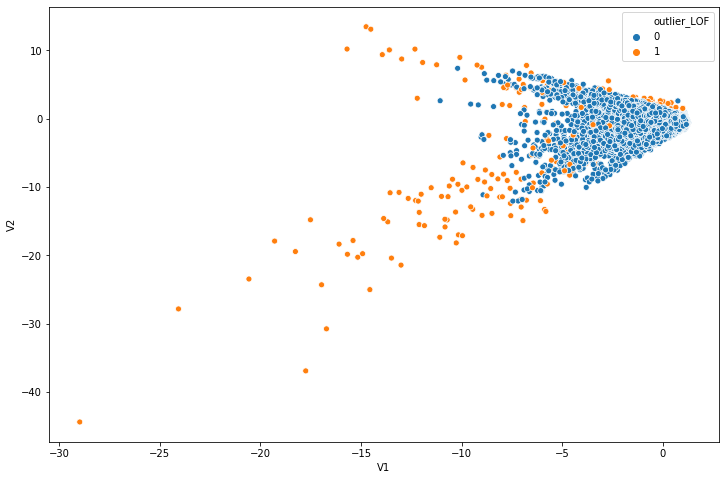

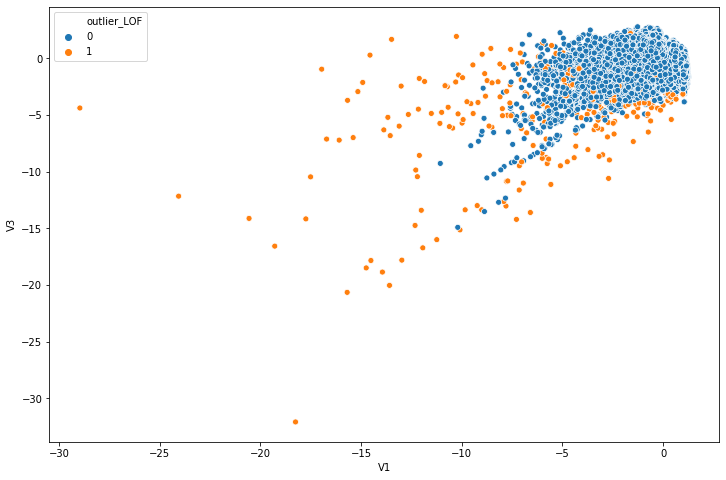

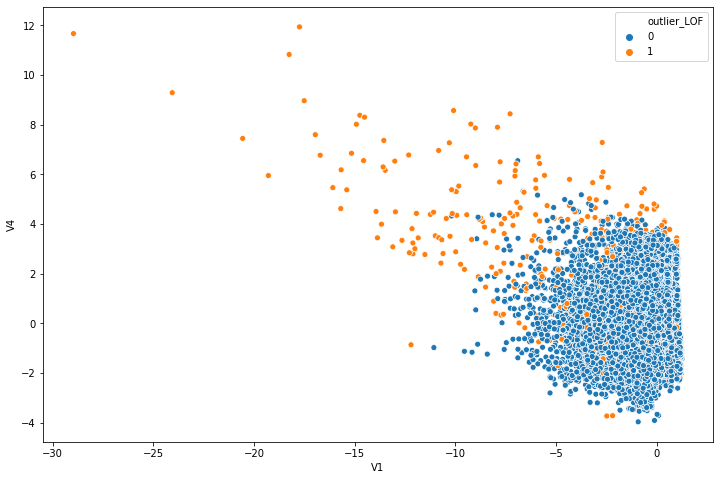

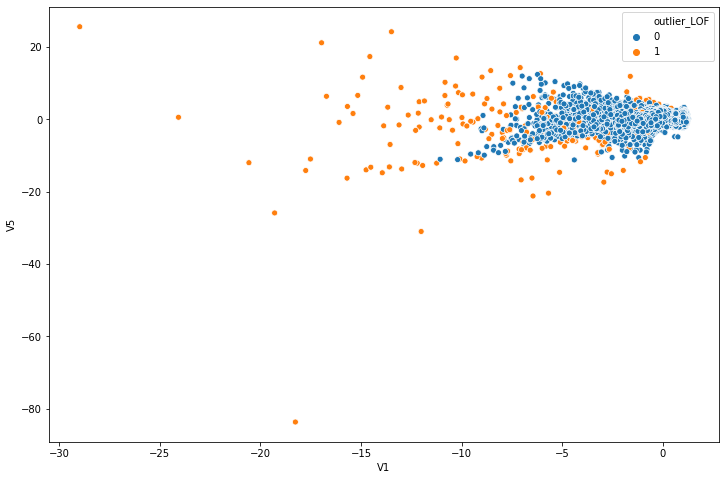

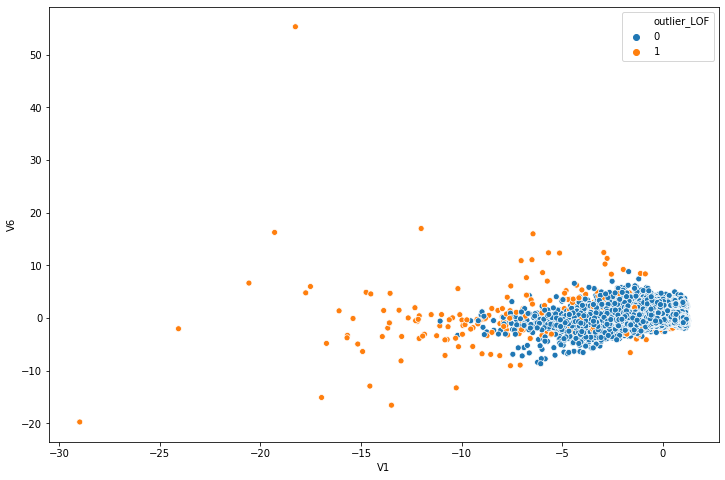

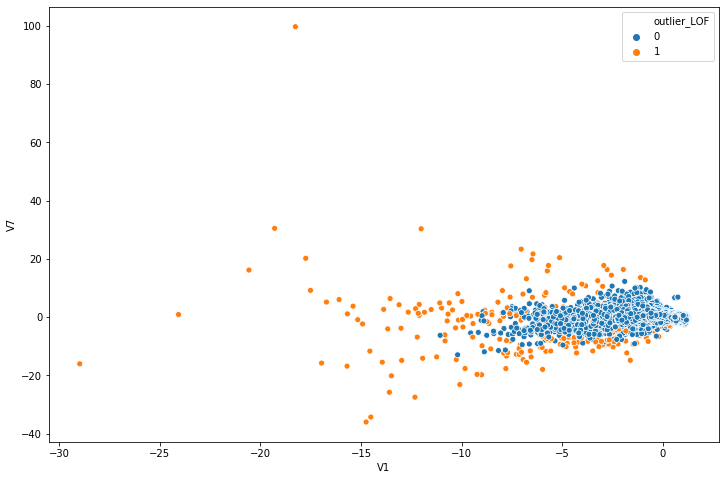

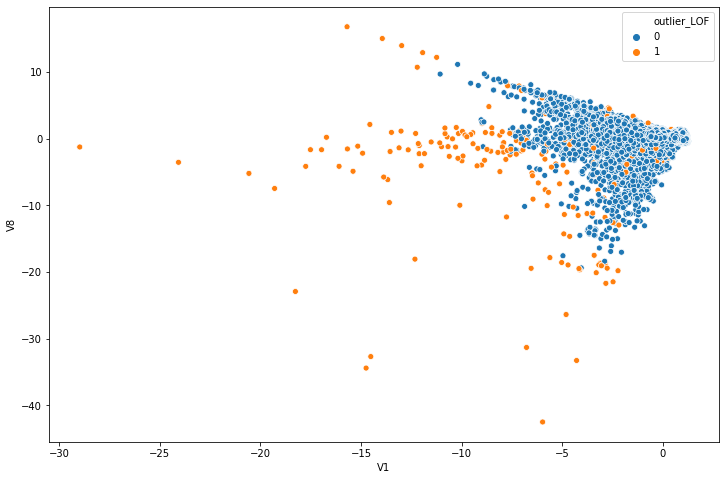

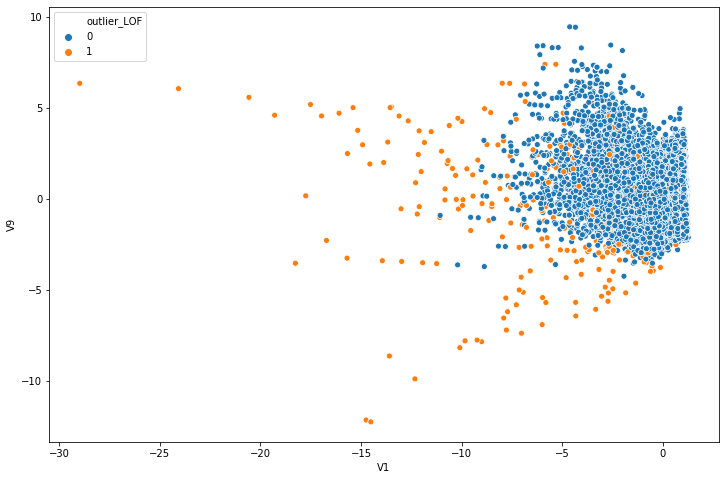

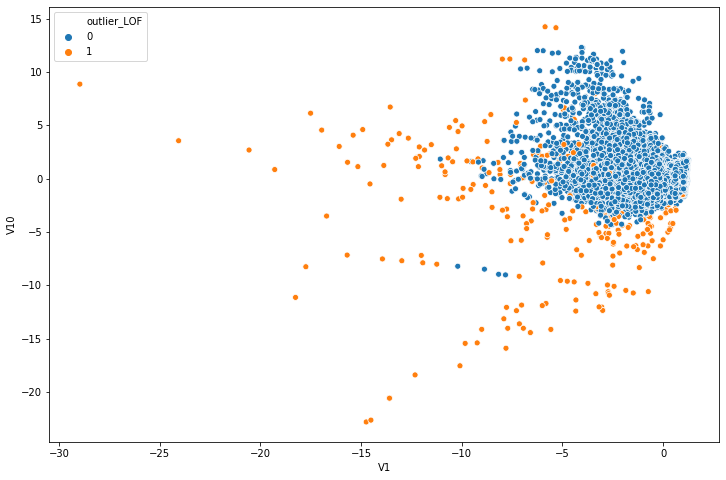

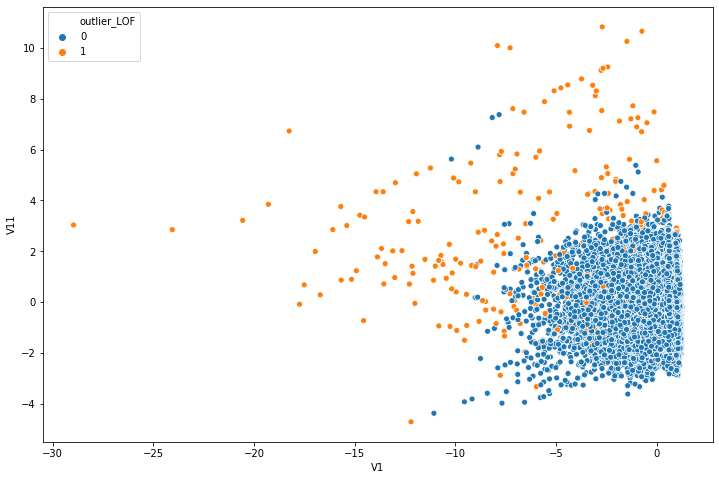

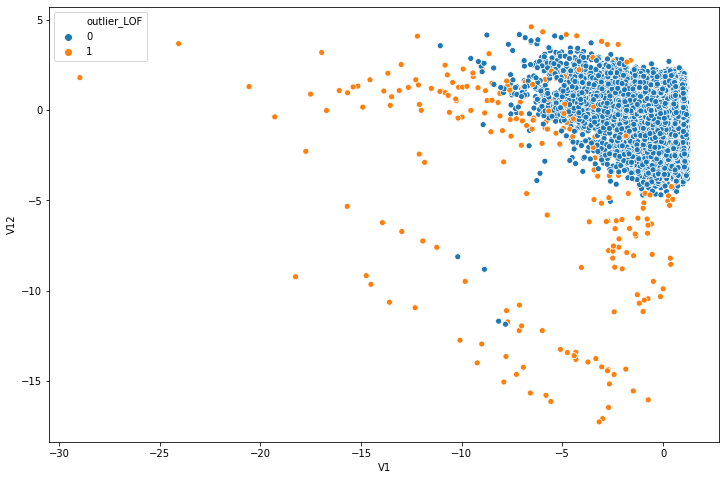

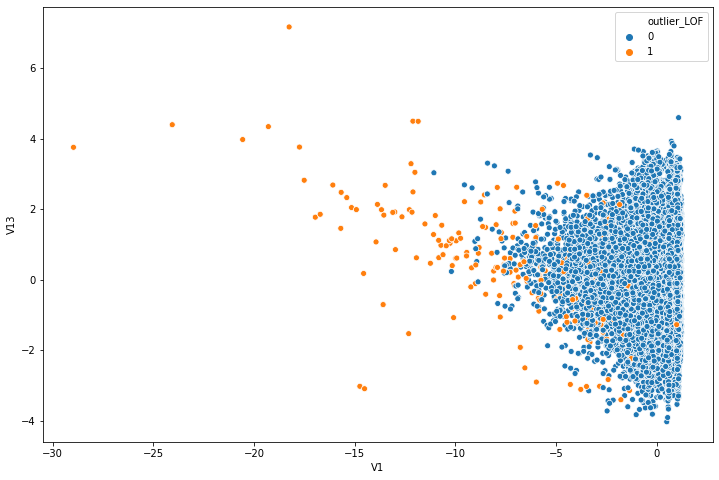

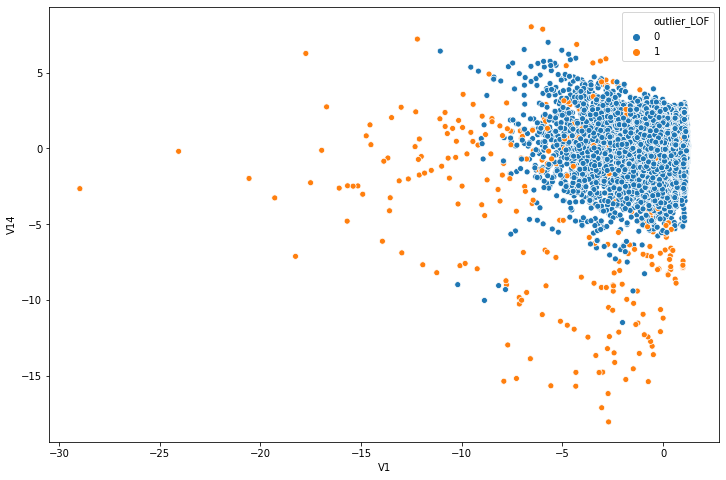

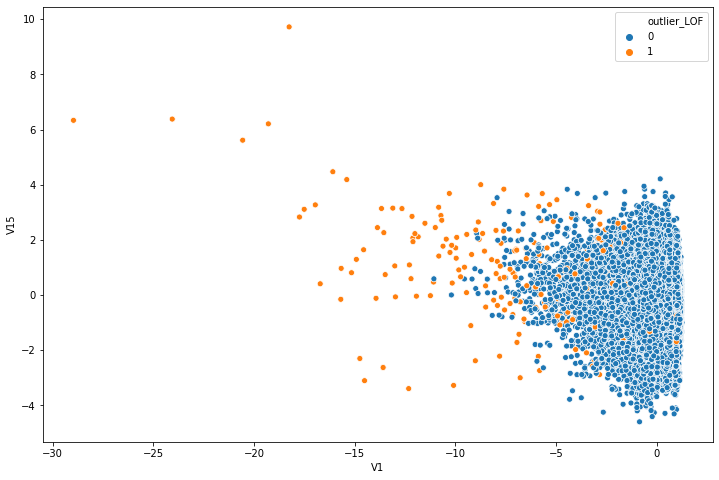

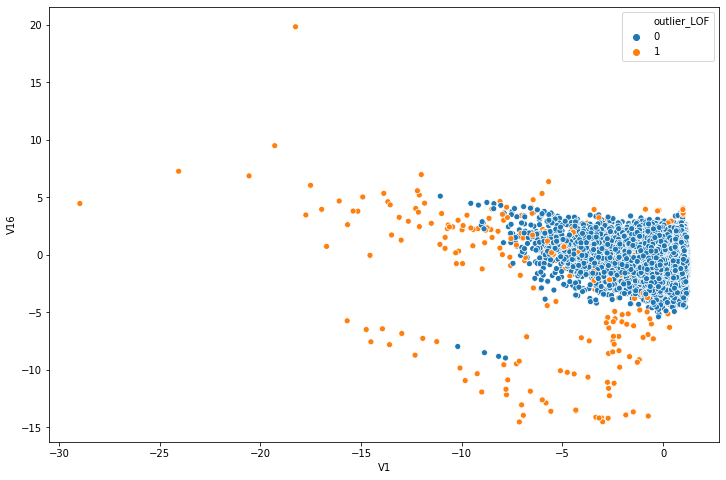

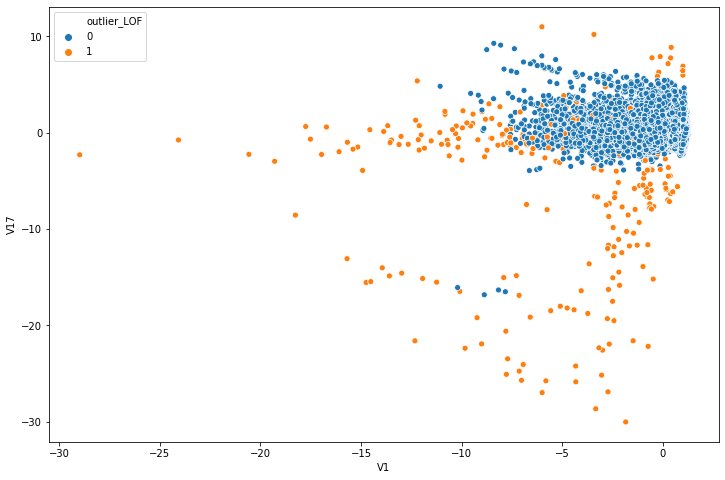

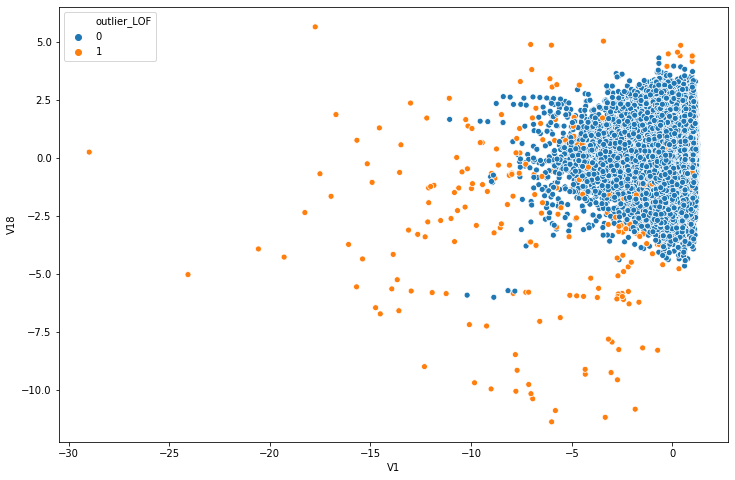

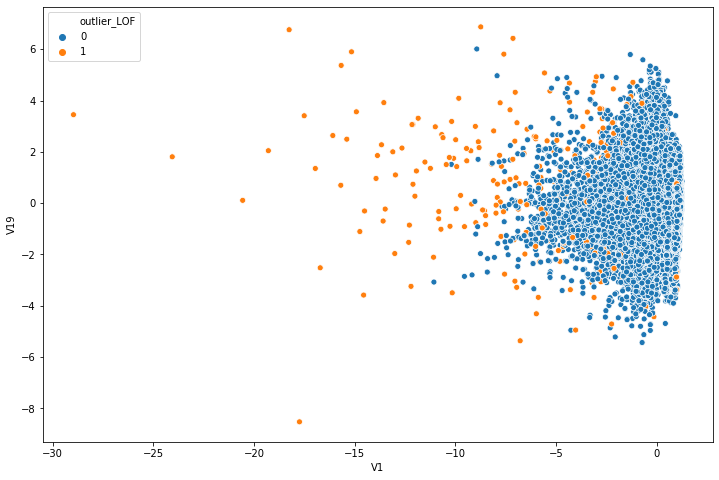

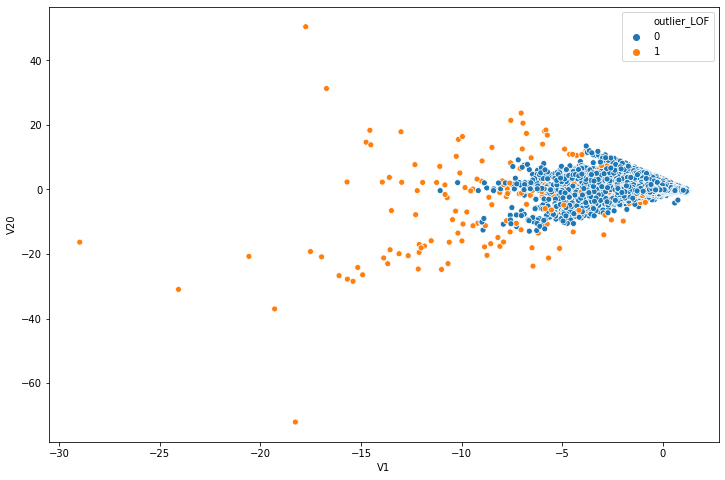

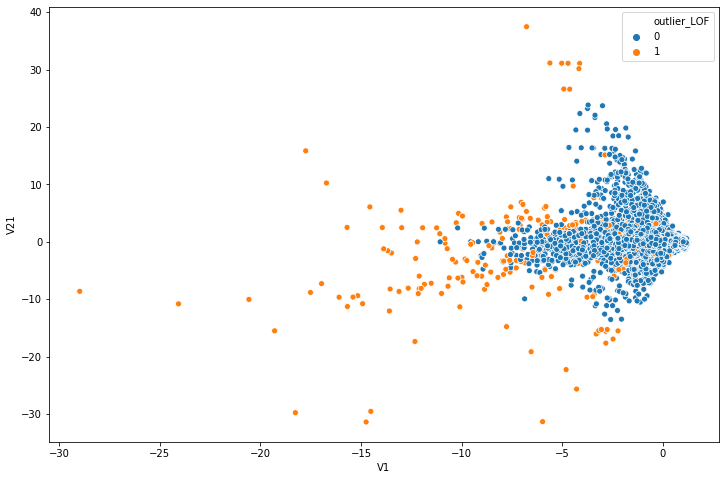

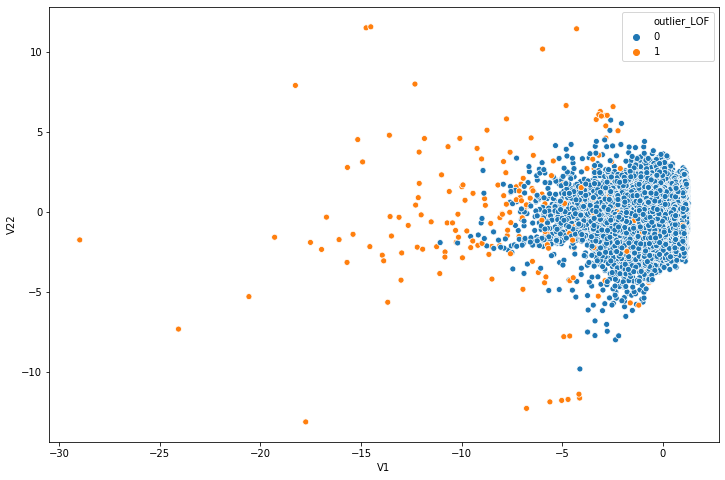

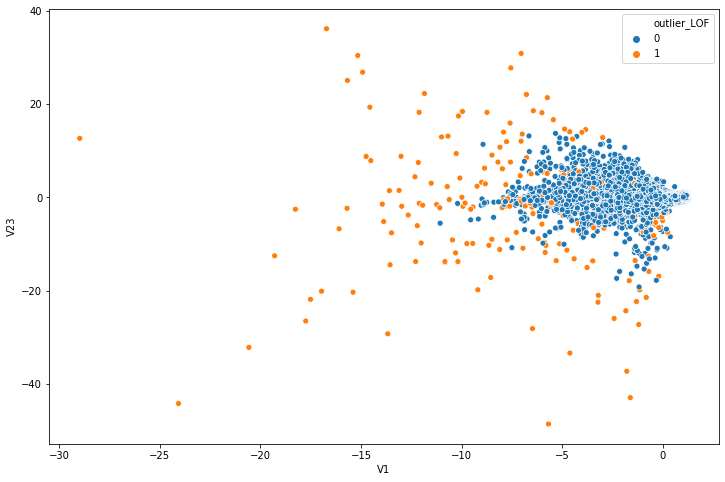

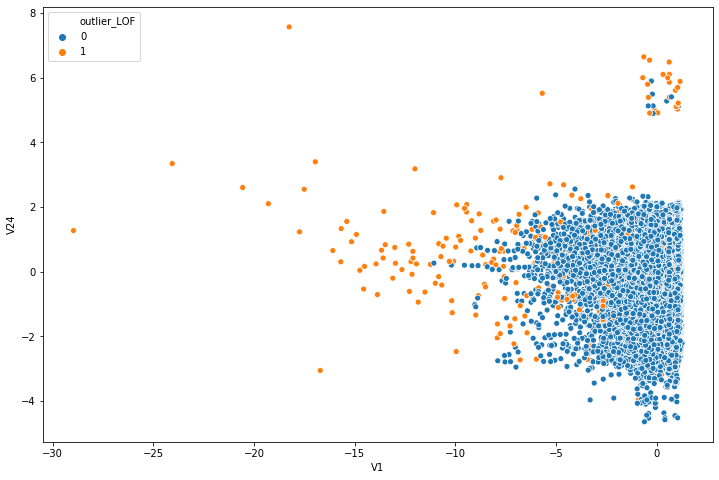

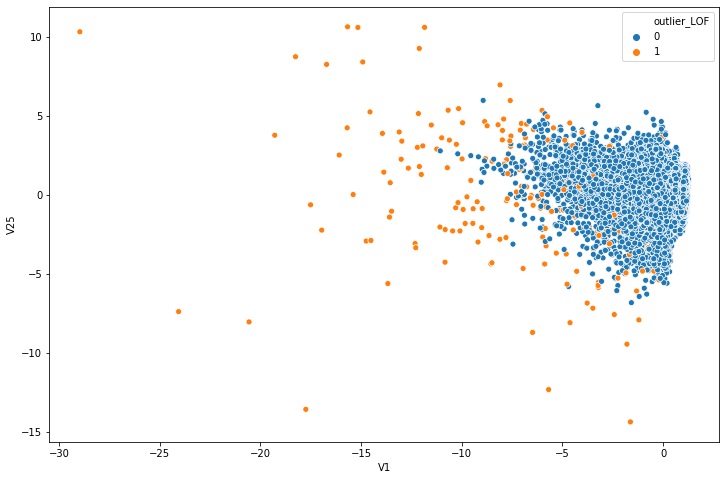

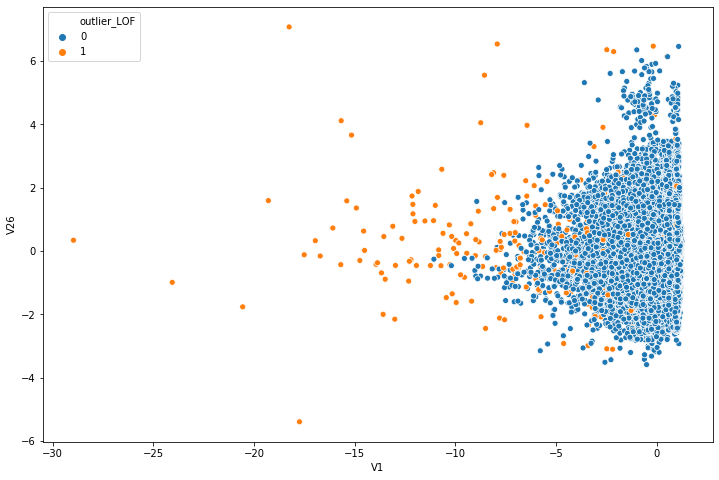

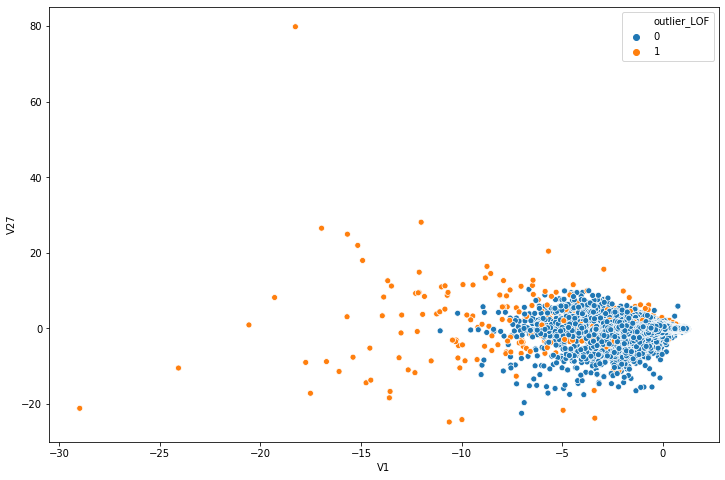

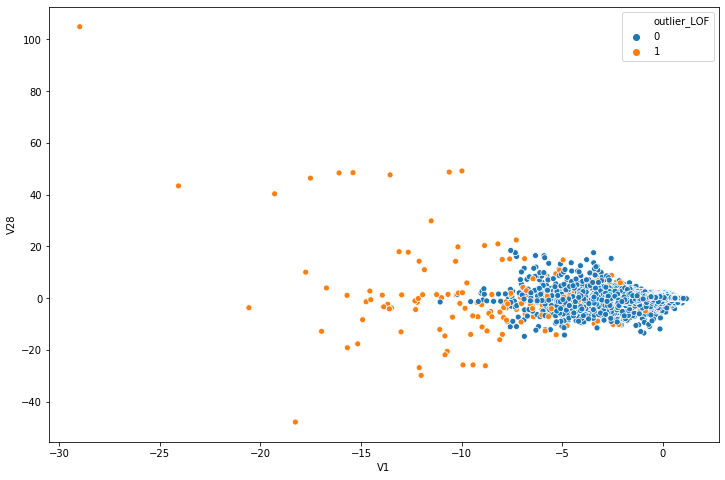

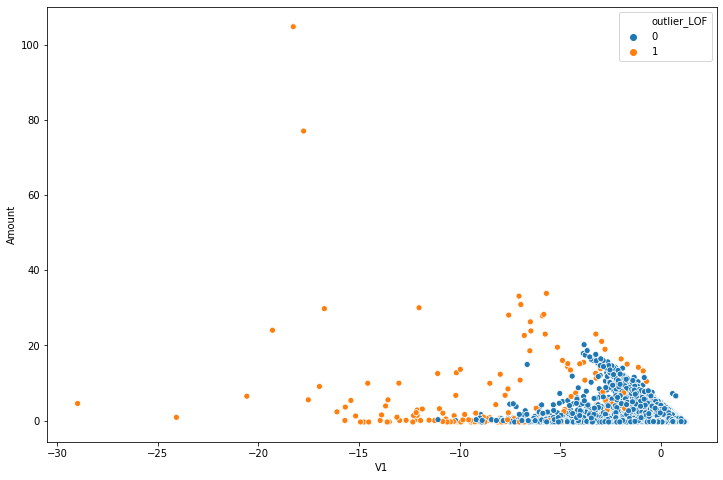

In [138]:
for i in ['V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']:
    figure = plt.subplots(figsize = (12,8))
    sns.scatterplot(x = 'V1', y = i,hue = 'outlier_LOF', data = df_copy )
    plt.show()

In [139]:
print("silhoute_score",metrics.silhouette_score(X_test_scaled,y_pred_test))

silhoute_score 0.5766407520948865


 ### K Means

[[71296 14004]
 [   95    48]]
0.8349894081434407
              precision    recall  f1-score   support

           0       1.00      0.84      0.91     85300
           1       0.00      0.34      0.01       143

    accuracy                           0.83     85443
   macro avg       0.50      0.59      0.46     85443
weighted avg       1.00      0.83      0.91     85443


### DBSCAN

[[180939  18076]
 [   349      0]]
0.9075811079231958
              precision    recall  f1-score   support

           0       1.00      0.91      0.95    199015
           1       0.00      0.00      0.00       349

    accuracy                           0.91    199364
   macro avg       0.50      0.45      0.48    199364
weighted avg       1.00      0.91      0.95    199364


### HDBSCAN

[[81047  4253]
 [  127    16]]
0.9487377549945578
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     85300
           1       0.00      0.11      0.01       143

    accuracy                           0.95     85443
   macro avg       0.50      0.53      0.49     85443
weighted avg       1.00      0.95      0.97     85443


### Local Outlier Factor

[[84554   746]
 [   34   109]]
0.9908711070538253
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85300
           1       0.13      0.76      0.22       143

    accuracy                           0.99     85443
   macro avg       0.56      0.88      0.61     85443
weighted avg       1.00      0.99      0.99     85443



### Comparing above 4 models , LOF has provided us the best accuracy of 99% and recall of 76%. Further Hyperparameter tunning may provide better results

### starting from the silhoute score of  (-)0.38 in DBSCAN we improved to score of (+)0.57 in LOF, which is a big achievement